# Graph of global surface temperature from 1880 to present

The data to generate this graph comes from the Goddard Institute for Space Studies (GISS) Surface Temperature Dataset (GISTEMP) available [here](http://data.giss.nasa.gov/gistemp/)

Data used are Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies (Land-Ocean Temperature Index, LOTI),
Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month in TXT and CSV format

### Load packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import Span
%matplotlib inline

### Read in CSV data

In [2]:
data = pd.read_csv("http://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv", na_values = ["**** ","***  ", "***"],skiprows=1)

### Select necessary columns

In [3]:
df = data.ix[:,1:13]

### Convert to Celsius (divide by 100)

In [4]:
df = df.divide(100)

### Add a year column

In [5]:
df['Year'] = data['Year']

### Index by year and stack the data, then reset the index

In [6]:
df2 = df.set_index('Year').stack().reset_index()

### Name the columns

In [7]:
df2.columns = ['Year','Month','Value']

### Add Datetime column based on year and month

In [8]:
df2["Date"] = pd.to_datetime(df2.Year.astype(str) + "-" + df2.Month, format="%Y-%b")
print(df2)

      Year Month   Value                Date
0     1880   Jan -0.0030 1880-01-01 00:00:00
1     1880   Feb -0.0020 1880-02-01 00:00:00
2     1880   Mar -0.0018 1880-03-01 00:00:00
3     1880   Apr -0.0028 1880-04-01 00:00:00
4     1880   May -0.0014 1880-05-01 00:00:00
5     1880   Jun -0.0029 1880-06-01 00:00:00
6     1880   Jul -0.0024 1880-07-01 00:00:00
7     1880   Aug -0.0008 1880-08-01 00:00:00
8     1880   Sep -0.0017 1880-09-01 00:00:00
9     1880   Oct -0.0016 1880-10-01 00:00:00
10    1880   Nov -0.0019 1880-11-01 00:00:00
11    1880   Dec -0.0021 1880-12-01 00:00:00
12    1881   Jan -0.0009 1881-01-01 00:00:00
13    1881   Feb -0.0014 1881-02-01 00:00:00
14    1881   Mar  0.0001 1881-03-01 00:00:00
15    1881   Apr -0.0003 1881-04-01 00:00:00
16    1881   May -0.0004 1881-05-01 00:00:00
17    1881   Jun -0.0028 1881-06-01 00:00:00
18    1881   Jul -0.0006 1881-07-01 00:00:00
19    1881   Aug -0.0002 1881-08-01 00:00:00
20    1881   Sep -0.0009 1881-09-01 00:00:00
21    1881

### Plot the monthly data

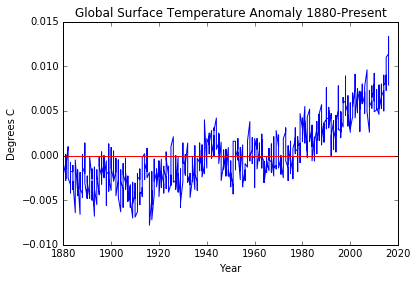

In [9]:
plt.plot(df2['Year'], df2['Value']) #plot x and y variables
plt.axhline(0,color='red') #red line marking 0
plt.title('Global Surface Temperature Anomaly 1880-Present') #title
plt.xlabel('Year')
plt.ylabel('Degrees C')

### Plot the Annual anomalies

In [10]:
#convert to Degrees C
data['J-D'] = data['J-D']/100

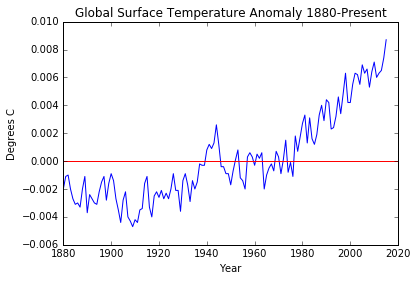

In [11]:
plt.plot(data['Year'], data['J-D']) #x and y axis
plt.axhline(0,color='red')
plt.title('Global Surface Temperature Anomaly 1880-Present') #title
plt.xlabel('Year')
plt.ylabel('Degrees C')

### Using Bokeh

In [12]:
output_notebook() #must be included for plot to show in notebook

BokehJS successfully loaded.

In [13]:
p = figure(plot_width = 800, plot_height=400, 
           title ='Monthly Mean Temperature Anomaly (1951-1980 baseline)',
           title_text_font_size='14pt', x_axis_type="datetime") 

p.line(df2['Date'], df2['Value'])  

hline = Span(location=0, dimension='width', 
             line_color='red', 
             line_width=1) #red line at 0

p.renderers.extend([hline]) #add line to the plot
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Temperature (Degrees C)'
#output_notebook('monthanomaly.html')      
show(p)

### Annual Temperature Anomaly

In [14]:
p = figure(plot_width = 800, plot_height=400, 
           title ='Annual Mean Temperature Anomaly (1951-1980 baseline)',
           title_text_font_size='14pt') 

p.line(data['Year'], data['J-D'])  
hline = Span(location=0, dimension='width', 
             line_color='red', 
             line_width=1) #red line at 0

p.renderers.extend([hline]) #add line to the plot
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Temperature (Degrees C)'     
show(p)